<a href="https://colab.research.google.com/github/kshitijrajsharma/fairpredictor/blob/main/fAIr_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fairpredictor==0.0.8

Efficientnet is only required for collab

In [ ]:
!pip install efficientnet

In [3]:
from predictor import predict

## Download Your local model
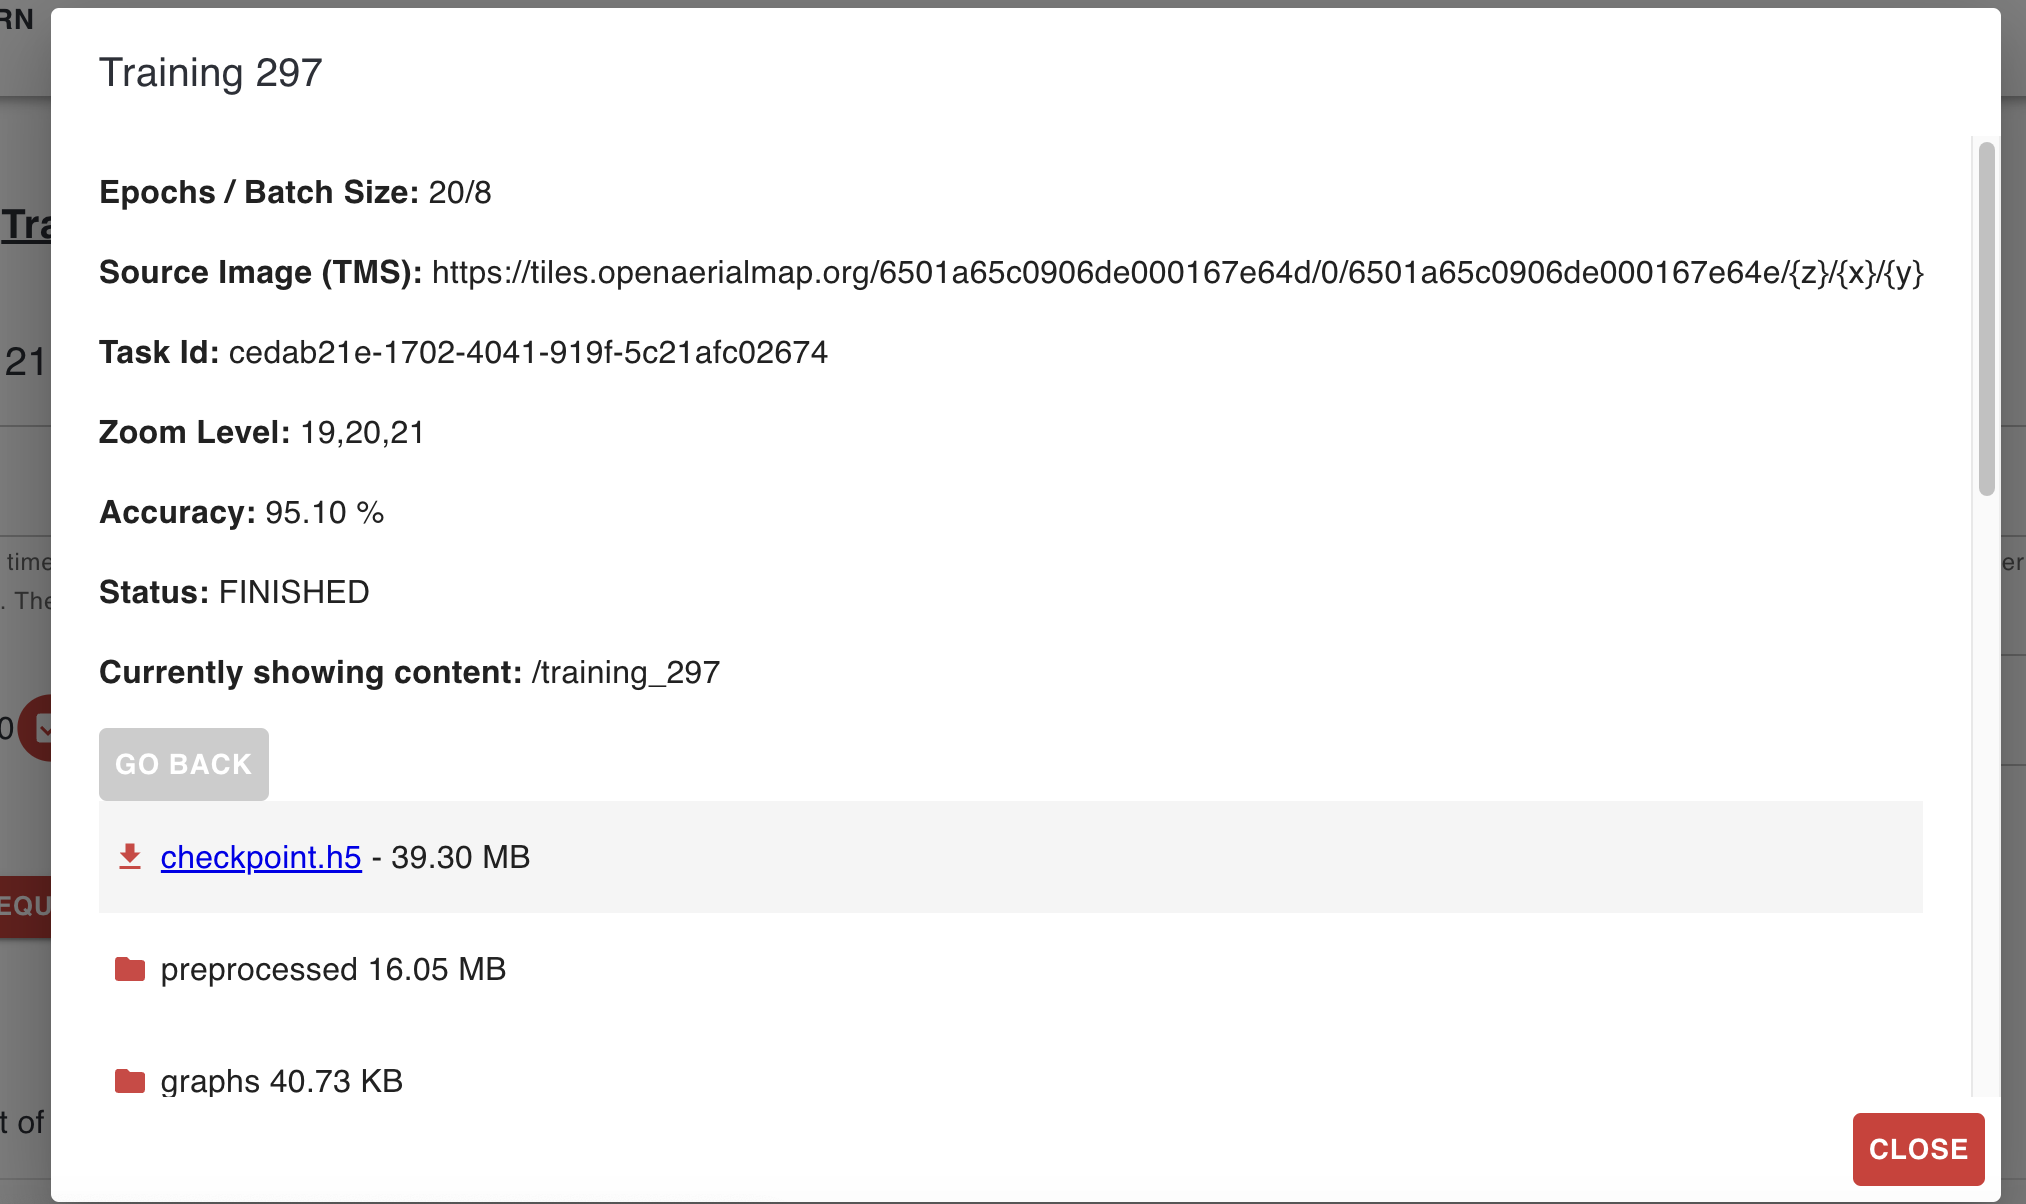

In [5]:
import requests
import shutil
url='https://fair-dev.hotosm.org/api/v1/workspace/download/dataset_65/output/training_297/checkpoint.h5'

response = requests.get(url, stream=True)

with open('checkpoint.h5', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)


**Parameters**
* **bbox** : Bounding box of the area you want to run prediction on
* **model_path** : Path of your downloaded model checkpoint
* **zoom_level** : Zoom level of the tiles to be used for prediction
* **tms_url** : Your Image URL on which you want to detect feature

In [6]:
bbox=[100.56228021333352,13.685230854641182,100.56383321235313,13.685961853747969]
model_path='checkpoint.h5'
zoom_level=20
tms_url='https://tiles.openaerialmap.org/6501a65c0906de000167e64d/0/6501a65c0906de000167e64e/{z}/{x}/{y}'


In [7]:
import efficientnet.keras as efn
my_predictions=predict(bbox,model_path,zoom_level,tms_url)
print(my_predictions)

Download starting from [817196, 484042] to [817201, 484040] using source https://tiles.openaerialmap.org/6501a65c0906de000167e64d/0/6501a65c0906de000167e64e/{z}/{x}/{y} - 20
Using : checkpoint.h5
It took 3 sec to load model
1/1 [==============================] - 0s 494ms/step
It took 9 sec to predict with 0.5 Confidence Threshold


Georeferencing for 8baa67ff-b407-4de4-b34f-f2177a96a453: 100%|██████████| 18/18 [00:00<00:00, 45.99it/s]


It took 0 sec to georeference


58it [00:00, 1078.13it/s]
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Polygon', 'coordinates': [[[100.56306347250938, 13.686019186915196], [100.56307286024094, 13.686015277836058], [100.56306213140488, 13.686003550598246], [100.56304469704627, 13.686015277836058], [100.56306347250938, 13.686019186915196]]]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Polygon', 'coordinates': [[[100.56298166513443, 13.686017883888823], [100.56298971176147, 13.686016580862445], [100.56298300623894, 13.68600876270401], [100.56294947862625, 13.68601136875685], [100.56296154856682, 13.686004853624697], [100.56295886635782, 13.68599312638637], [100.56292802095413, 13.68595273256098], [100.5629199743271, 13.68595664164116], [100.5629213154316, 13.685973580987852], [100.56289985775948, 13.685977490067685], [100.56293338537215, 13.686016580862445], [100.56298166513443, 13.68601788

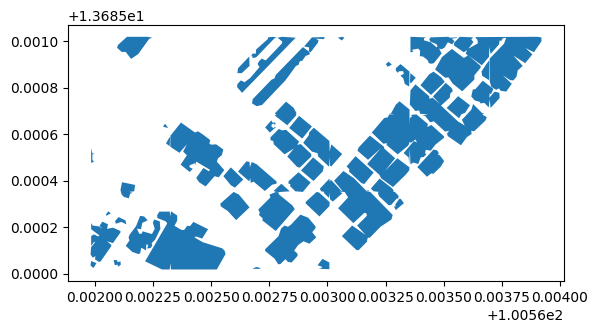

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame.from_features(my_predictions)
gdf.plot()
plt.show()